In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Loading Excel file

df = pd.read_excel("Prodigy1.xls", skiprows=3)

In [9]:
# Melting the dataframe so 'Year' becomes a column
df_melted = df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value')

In [11]:
# Converting Year to numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [13]:
# Dropping missing values
df_melted.dropna(subset=['Value'], inplace=True)

In [15]:
# Example: histogram of values for a specific year
year_to_plot = 2020
data_for_year = df_melted[df_melted['Year'] == year_to_plot]['Value']

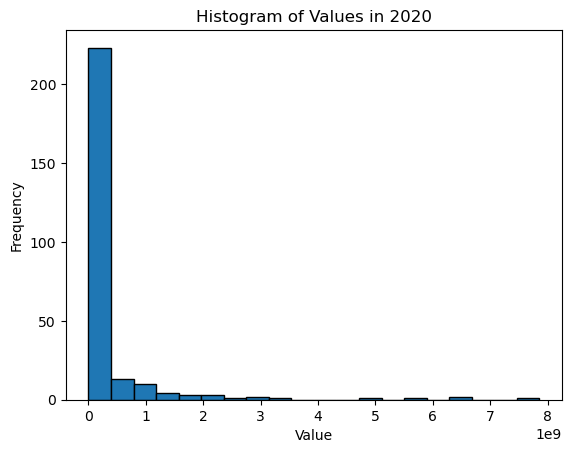

In [17]:
plt.hist(data_for_year, bins=20, edgecolor='black')
plt.title(f'Histogram of Values in {year_to_plot}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Filter for a single country (example: Nigeria)
nigeria_data = df[df["Country Name"] == "Nigeria"]

In [21]:
# Reshape from wide to long format
nigeria_long = nigeria_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value")

In [23]:
# Keep only the numeric years (exclude non-year columns)
nigeria_long = nigeria_long[nigeria_long["Year"].str.isdigit()]
nigeria_long["Year"] = nigeria_long["Year"].astype(int)

<BarContainer object of 65 artists>

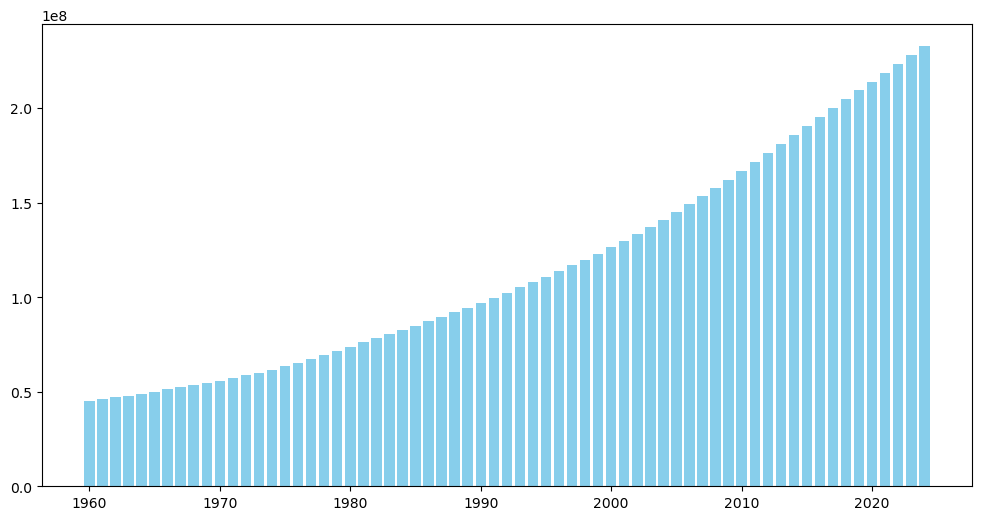

In [25]:
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(nigeria_long["Year"], nigeria_long["Value"], color="skyblue")

Conclusion & Insights

This project analyzed data from the World Bank dataset containing various country-level indicators from 1960 to 2024. The analysis focused on two main visualizations:

Histogram – A histogram was plotted for a selected year to understand the distribution of values across all countries for the chosen indicator.

The histogram showed that most countries cluster within a certain value range, indicating similarities in the indicator for many nations, while a few countries have significantly higher or lower values, suggesting outliers or exceptional cases.

Bar Chart – A bar chart was plotted for Nigeria to observe how the indicator has changed over time.

The chart revealed visible trends, including periods of growth, stability, and decline. These trends could be linked to historical, economic, or policy events in Nigeria during the observed years.

Overall, the visualizations provided a clear picture of both the global distribution of the indicator in a specific year and the historical trend for Nigeria.
Future work could involve comparing Nigeria’s trends to regional or global averages, identifying potential drivers behind observed changes, and extending the analysis to other countries or indicators.